# Set up and Install libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dataset path
data_set_source = "./datasets.csv"

# reading dataset and parsing date
df = pd.read_csv(data_set_source, parse_dates=["BILL_DATE"])

C:\Users\vithc\AppData\Local\Temp\ipykernel_44460\222467365.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_set_source, parse_dates=["BILL_DATE"])


# Cleaning Data

In [3]:
# convertion the QTY type from object to int64.
# we need to convert to string this column has mixed value between string and integer number.
# after convert to str we will delete "," comma in number.

df['QTY'] = df['QTY'].astype(str)
df['QTY'] = pd.to_numeric(df['QTY'].str.replace(',', ''), errors='coerce')

# Deleing white all space from string
df['CONSIGNEE_AMPHUR'] = df['CONSIGNEE_AMPHUR'].str.strip()
df['CONSIGNEE_PROVINCE'] = df['CONSIGNEE_PROVINCE'].str.strip()
df['CONSIGNEE_TAMBON'] = df['CONSIGNEE_TAMBON'].str.strip()
df['CONSIGNEE_ZIPCODE'] = df['CONSIGNEE_ZIPCODE'].str.strip()

df['ITEM_CODE'] = df['ITEM_CODE'].str.strip()
df['ITEM_DESCแสดงหน้าบิล'] = df['ITEM_DESCแสดงหน้าบิล'].str.strip()
df['ITEM_NAMEในระบบ'] = df['ITEM_NAMEในระบบ'].str.strip()

df['UNIT_NAME'] = df['UNIT_NAME'].str.strip()

df['DEST_CODE'] = df['DEST_CODE'].str.strip()
df['REG_Code'] = df['REG_Code'].str.strip()

In [4]:
df[df['CONSIGNEE_PROVINCE'].isnull()]

,BILL_INDEX,BILL_DATE,CONSIGNEE_TAMBON,CONSIGNEE_AMPHUR,CONSIGNEE_PROVINCE,CONSIGNEE_ZIPCODE,ITEM_CODE,ITEM_DESCแสดงหน้าบิล,ITEM_NAMEในระบบ,QTY,UNIT_NAME,REG_Code,DEST_CODE
332626,332626,2024-02-20,สันปูเลย,NaN,NaN,,99999.000,ผ้า,ผ้า,2,ม้วน,R20,D06
671232,671232,2024-01-16,บ้านแหวน,NaN,NaN,,99999.000,ผ้า,ผ้า,3,ห่อ,R19,D06


In [5]:
df.at[332626, 'CONSIGNEE_PROVINCE'] = 'เชียงใหม่'
df.at[671232, 'CONSIGNEE_PROVINCE'] = 'เชียงใหม่'

In [6]:
df[df['CONSIGNEE_PROVINCE'].isnull()]

,BILL_INDEX,BILL_DATE,CONSIGNEE_TAMBON,CONSIGNEE_AMPHUR,CONSIGNEE_PROVINCE,CONSIGNEE_ZIPCODE,ITEM_CODE,ITEM_DESCแสดงหน้าบิล,ITEM_NAMEในระบบ,QTY,UNIT_NAME,REG_Code,DEST_CODE


# Extract Data

In [7]:
columns = ['BILL_INDEX', 'BILL_DATE',
		   'CONSIGNEE_PROVINCE', 'ITEM_CODE',
		   'ITEM_DESCแสดงหน้าบิล', 'ITEM_NAMEในระบบ', 'QTY', 'UNIT_NAME',
		   'REG_Code', 'DEST_CODE'
]
df = df[columns]

In [8]:
df.sort_values(by="ITEM_NAMEในระบบ",ascending=False)

,BILL_INDEX,BILL_DATE,CONSIGNEE_PROVINCE,ITEM_CODE,ITEM_DESCแสดงหน้าบิล,ITEM_NAMEในระบบ,QTY,UNIT_NAME,REG_Code,DEST_CODE
866090,866090,2024-06-29,กรุงเทพมหานคร,99999.000,๙ิลิโคล,๙ิลิโคล,3,กล่อง,R15,D07
790059,790059,2024-06-18,พะเยา,99999.000,ํธูป 12,ํธูป 12,2,กล่อง,R20,D18
751252,751252,2024-01-27,เชียงใหม่,99999.000,๋กระเป๋า,๋กระเป๋า,2,กล่อง,R32,D06
751246,751246,2024-01-27,เชียงใหม่,99999.000,๋กระเป๋า,๋กระเป๋า,17,กล่อง,R32,D06
606919,606919,2024-04-03,เชียงใหม่,99999.000,๊สติ๊กเกอร์,๊สติ๊กเกอร์,1,กล่อง,R19,D06
...,...,...,...,...,...,...,...,...,...,...
82934,82934,2024-03-13,เชียงราย,99999.000,มู่ลี่ไม้,",^J]UJW,H",2,ห่อ,R20,D28
289753,289753,2024-06-14,แม่ฮ่องสอน,99999.005,กล่อง,+กล่อง,4,กล่อง,R06,D29
104006,104006,2024-03-15,แม่ฮ่องสอน,99999.000,(ากกั้นห้อง,(ากกั้นห้อง,1,ห่อ,R20,D06
1088759,1088759,2024-03-18,เชียงราย,99999.002,ปูอัด(1มัดมี2กล่อง),(1มัดมี2กล่อง),3,มัด,R19,D05


In [9]:
df.groupby(by=["ITEM_NAMEในระบบ"])['QTY'].sum().reset_index().head(50)

,ITEM_NAMEในระบบ,QTY
0,,1
1,(1มัดมี2กล่อง),3
2,(ากกั้นห้อง,1
3,+กล่อง,4
4,",^J]UJW,H",2
5,",jko,h;o",1
6,",vg9viN",1
7,-HV9JV,1
8,-hk;gdiup[,4
9,"-o,",19


In [10]:
df.to_csv("cleaned_dataset.csv")

# Demand by Destination

In [11]:
destination_df = df.copy()

In [12]:
destination_columns = ['BILL_DATE', 'CONSIGNEE_PROVINCE', 'QTY']
destination_df = destination_df[destination_columns]

In [13]:
destination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184926 entries, 0 to 1184925
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   BILL_DATE           1184926 non-null  datetime64[ns]
 1   CONSIGNEE_PROVINCE  1184926 non-null  object        
 2   QTY                 1184926 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.1+ MB


In [33]:
# destination_df[(destination_df['BILL_DATE'] == '2024-01-01') & (destination_df['CONSIGNEE_PROVINCE'] == "กาญจนบุรี")]['QTY'].sum()

0

In [34]:
pivot_df = destination_df.pivot_table(index='BILL_DATE', columns='CONSIGNEE_PROVINCE', values='QTY', aggfunc='sum')
pivot_df

CONSIGNEE_PROVINCE,กระบี่,กรุงเทพมหานคร,กาญจนบุรี,กาฬสินธุ์,กำแพงเพชร,ขอนแก่น,จันทบุรี,ฉะเชิงเทรา,ชลบุรี,ชัยนาท,...,อุทัยธานี,อุบลราชธานี,อ่างทอง,เชียงราย,เชียงใหม่,เพชรบุรี,เพชรบูรณ์,เลย,แพร่,แม่ฮ่องสอน
BILL_DATE,,,,,,,,,,,,,,,,,,,,,
2024-01-01,NaN,1241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN
2024-01-02,NaN,5209.0,NaN,NaN,NaN,4.0,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,864.0,3442.0,NaN,NaN,NaN,224.0,107.0
2024-01-03,NaN,9196.0,4.0,NaN,6.0,3.0,NaN,4.0,3.0,NaN,...,NaN,NaN,NaN,3415.0,12082.0,NaN,9.0,NaN,600.0,1121.0
2024-01-04,NaN,7807.0,NaN,NaN,NaN,8.0,NaN,1.0,6.0,NaN,...,NaN,NaN,NaN,3727.0,15066.0,NaN,NaN,NaN,945.0,932.0
2024-01-05,1.0,7250.0,NaN,NaN,2.0,12.0,10.0,4.0,1.0,NaN,...,NaN,NaN,NaN,4005.0,15213.0,NaN,9.0,NaN,934.0,791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26,1.0,8382.0,1.0,NaN,NaN,8.0,NaN,NaN,4.0,NaN,...,NaN,1.0,NaN,3163.0,12579.0,NaN,NaN,15.0,918.0,739.0
2024-06-27,NaN,10953.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4134.0,15918.0,NaN,NaN,NaN,997.0,261.0
2024-06-28,NaN,6848.0,NaN,NaN,NaN,17.0,NaN,5.0,1.0,NaN,...,NaN,6.0,NaN,3844.0,12439.0,NaN,NaN,NaN,1052.0,745.0


In [35]:
pivot_df = pivot_df.fillna(0)
pivot_df

CONSIGNEE_PROVINCE,กระบี่,กรุงเทพมหานคร,กาญจนบุรี,กาฬสินธุ์,กำแพงเพชร,ขอนแก่น,จันทบุรี,ฉะเชิงเทรา,ชลบุรี,ชัยนาท,...,อุทัยธานี,อุบลราชธานี,อ่างทอง,เชียงราย,เชียงใหม่,เพชรบุรี,เพชรบูรณ์,เลย,แพร่,แม่ฮ่องสอน
BILL_DATE,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.0,1241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0
2024-01-02,0.0,5209.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,864.0,3442.0,0.0,0.0,0.0,224.0,107.0
2024-01-03,0.0,9196.0,4.0,0.0,6.0,3.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,3415.0,12082.0,0.0,9.0,0.0,600.0,1121.0
2024-01-04,0.0,7807.0,0.0,0.0,0.0,8.0,0.0,1.0,6.0,0.0,...,0.0,0.0,0.0,3727.0,15066.0,0.0,0.0,0.0,945.0,932.0
2024-01-05,1.0,7250.0,0.0,0.0,2.0,12.0,10.0,4.0,1.0,0.0,...,0.0,0.0,0.0,4005.0,15213.0,0.0,9.0,0.0,934.0,791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26,1.0,8382.0,1.0,0.0,0.0,8.0,0.0,0.0,4.0,0.0,...,0.0,1.0,0.0,3163.0,12579.0,0.0,0.0,15.0,918.0,739.0
2024-06-27,0.0,10953.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4134.0,15918.0,0.0,0.0,0.0,997.0,261.0
2024-06-28,0.0,6848.0,0.0,0.0,0.0,17.0,0.0,5.0,1.0,0.0,...,0.0,6.0,0.0,3844.0,12439.0,0.0,0.0,0.0,1052.0,745.0


In [36]:
# อยากลองทำไม่รู้เหมือนกันว่าหาทำไม
pivot_df.corr()

CONSIGNEE_PROVINCE,กระบี่,กรุงเทพมหานคร,กาญจนบุรี,กาฬสินธุ์,กำแพงเพชร,ขอนแก่น,จันทบุรี,ฉะเชิงเทรา,ชลบุรี,ชัยนาท,...,อุทัยธานี,อุบลราชธานี,อ่างทอง,เชียงราย,เชียงใหม่,เพชรบุรี,เพชรบูรณ์,เลย,แพร่,แม่ฮ่องสอน
CONSIGNEE_PROVINCE,,,,,,,,,,,,,,,,,,,,,
กระบี่,1.000000,-0.040153,-0.045355,-0.022502,-0.018810,0.027594,-0.043340,0.119983,-0.035306,-0.022091,...,-0.045104,-0.039653,-0.023657,0.050984,0.088760,-0.019086,-0.014906,0.080945,0.022065,0.000781
กรุงเทพมหานคร,-0.040153,1.000000,-0.010050,0.064697,0.009592,0.234602,0.143587,0.183244,0.129850,0.117964,...,0.094395,0.011484,0.018471,0.624272,0.686763,-0.010613,0.103096,0.089615,0.619086,0.448051
กาญจนบุรี,-0.045355,-0.010050,1.000000,-0.030238,-0.029121,0.124600,0.020258,-0.089118,-0.061724,0.162739,...,0.048899,-0.032124,0.161487,0.039923,0.001316,-0.020918,-0.026001,0.043169,0.019997,0.056555
กาฬสินธุ์,-0.022502,0.064697,-0.030238,1.000000,-0.019110,0.053949,0.123379,0.070440,-0.006345,0.004765,...,0.144962,-0.036270,-0.024397,0.093825,0.049906,0.003546,-0.011151,-0.020241,0.093339,0.011024
กำแพงเพชร,-0.018810,0.009592,-0.029121,-0.019110,1.000000,-0.038875,-0.018810,0.010710,0.008920,-0.007711,...,-0.026754,-0.032300,-0.024971,0.074391,0.070572,-0.014749,-0.010721,0.004863,0.105912,0.133765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
เพชรบุรี,-0.019086,-0.010613,-0.020918,0.003546,-0.014749,0.070747,0.177596,0.041579,-0.047227,0.125477,...,-0.028624,0.042595,0.057177,0.124843,0.079043,1.000000,-0.009274,-0.052437,0.094366,-0.010279
เพชรบูรณ์,-0.014906,0.103096,-0.026001,-0.011151,-0.010721,-0.002544,-0.030021,-0.032904,-0.033839,-0.028136,...,-0.016744,-0.024381,-0.015219,0.008301,0.041683,-0.009274,1.000000,-0.026177,0.129052,0.157704
เลย,0.080945,0.089615,0.043169,-0.020241,0.004863,0.043620,0.060828,-0.075460,0.094576,-0.012755,...,-0.058748,0.091361,0.048264,0.125249,0.149121,-0.052437,-0.026177,1.000000,0.142936,0.091119


In [43]:
pivot_df

CONSIGNEE_PROVINCE,กระบี่,กรุงเทพมหานคร,กาญจนบุรี,กาฬสินธุ์,กำแพงเพชร,ขอนแก่น,จันทบุรี,ฉะเชิงเทรา,ชลบุรี,ชัยนาท,...,อุทัยธานี,อุบลราชธานี,อ่างทอง,เชียงราย,เชียงใหม่,เพชรบุรี,เพชรบูรณ์,เลย,แพร่,แม่ฮ่องสอน
BILL_DATE,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.0,1241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0
2024-01-02,0.0,5209.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,864.0,3442.0,0.0,0.0,0.0,224.0,107.0
2024-01-03,0.0,9196.0,4.0,0.0,6.0,3.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,3415.0,12082.0,0.0,9.0,0.0,600.0,1121.0
2024-01-04,0.0,7807.0,0.0,0.0,0.0,8.0,0.0,1.0,6.0,0.0,...,0.0,0.0,0.0,3727.0,15066.0,0.0,0.0,0.0,945.0,932.0
2024-01-05,1.0,7250.0,0.0,0.0,2.0,12.0,10.0,4.0,1.0,0.0,...,0.0,0.0,0.0,4005.0,15213.0,0.0,9.0,0.0,934.0,791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26,1.0,8382.0,1.0,0.0,0.0,8.0,0.0,0.0,4.0,0.0,...,0.0,1.0,0.0,3163.0,12579.0,0.0,0.0,15.0,918.0,739.0
2024-06-27,0.0,10953.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4134.0,15918.0,0.0,0.0,0.0,997.0,261.0
2024-06-28,0.0,6848.0,0.0,0.0,0.0,17.0,0.0,5.0,1.0,0.0,...,0.0,6.0,0.0,3844.0,12439.0,0.0,0.0,0.0,1052.0,745.0


# Forecasting Province Demand

In [126]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [137]:
province_df_pivot = pivot_df.copy()
province_df_pivot['BILL_DATE'] = province_df_pivot.index
province_df_pivot = province_df_pivot.reset_index(drop=True)
province_df_pivot.columns.name = ""
data = province_df_pivot.sort_values('BILL_DATE').reset_index(drop=True).copy()
data = data.rename(columns={"BILL_DATE": "ds"})

In [128]:
def predict_province_demand(data: pd.DataFrame, date: str, y: str):
	df_pre = data[[date, y]]
	df_pre = df_pre.rename(columns={date: "ds", y: "y"})
	model = Prophet(
		yearly_seasonality=True,
		weekly_seasonality=True,
		daily_seasonality=False
	)
	model.fit(df_pre)
	future = model.make_future_dataframe(periods=10)
	forecast = model.predict(future)
	dfcst = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
	return dfcst

In [129]:
# data
dfcst = predict_province_demand(data=data, date="ds", y='เชียงใหม่')

01:00:07 - cmdstanpy - INFO - Chain [1] start processing
01:00:07 - cmdstanpy - INFO - Chain [1] done processing


In [130]:
# dfcst
chiangmai_df = data[["ds", 'เชียงใหม่']].copy()
dt = pd.merge(chiangmai_df, dfcst, left_on='ds', right_on='ds')
dt['error'] = dt['yhat'] - dt['เชียงใหม่']
dt

,ds,เชียงใหม่,yhat,yhat_lower,yhat_upper,error
0,2024-01-01,62.0,7734.430137,4648.907018,10916.503108,7672.430137
1,2024-01-02,3442.0,9302.972863,6308.693168,12404.231115,5860.972863
2,2024-01-03,12082.0,9771.310772,6879.244466,12742.288182,-2310.689228
3,2024-01-04,15066.0,10973.816259,7917.611489,14148.490527,-4092.183741
4,2024-01-05,15213.0,11094.275911,7954.814596,14201.661370,-4118.724089
...,...,...,...,...,...,...
177,2024-06-26,12579.0,13666.158864,10622.478332,16584.334733,1087.158864
178,2024-06-27,15918.0,14175.398885,11072.720187,17145.256639,-1742.601115
179,2024-06-28,12439.0,13627.881377,10626.824813,16726.846247,1188.881377
180,2024-06-29,12242.0,11774.993394,8704.193476,14653.851607,-467.006606


In [121]:
dt.head().to_dict()

{'ds': {0: Timestamp('2024-01-01 00:00:00'),
  1: Timestamp('2024-01-02 00:00:00'),
  2: Timestamp('2024-01-03 00:00:00'),
  3: Timestamp('2024-01-04 00:00:00'),
  4: Timestamp('2024-01-05 00:00:00')},
 'เชียงใหม่': {0: 62.0, 1: 3442.0, 2: 12082.0, 3: 15066.0, 4: 15213.0},
 'yhat': {0: 11721.905392512217,
  1: 12631.680159960613,
  2: 12453.672382688146,
  3: 13030.498571525606,
  4: 12555.041881063797},
 'yhat_lower': {0: 8526.903413268827,
  1: 9510.208896733538,
  2: 9243.505121494843,
  3: 9849.756730579435,
  4: 9254.18900782555},
 'yhat_upper': {0: 15039.750908620626,
  1: 15968.471866511682,
  2: 15631.010290240687,
  3: 16353.983975307974,
  4: 16035.7691653451},
 'error': {0: 11659.905392512217,
  1: 9189.680159960613,
  2: 371.6723826881462,
  3: -2035.5014284743938,
  4: -2657.9581189362034}}

# Exponential Smoothing

c:\Users\vithc\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vithc\miniconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


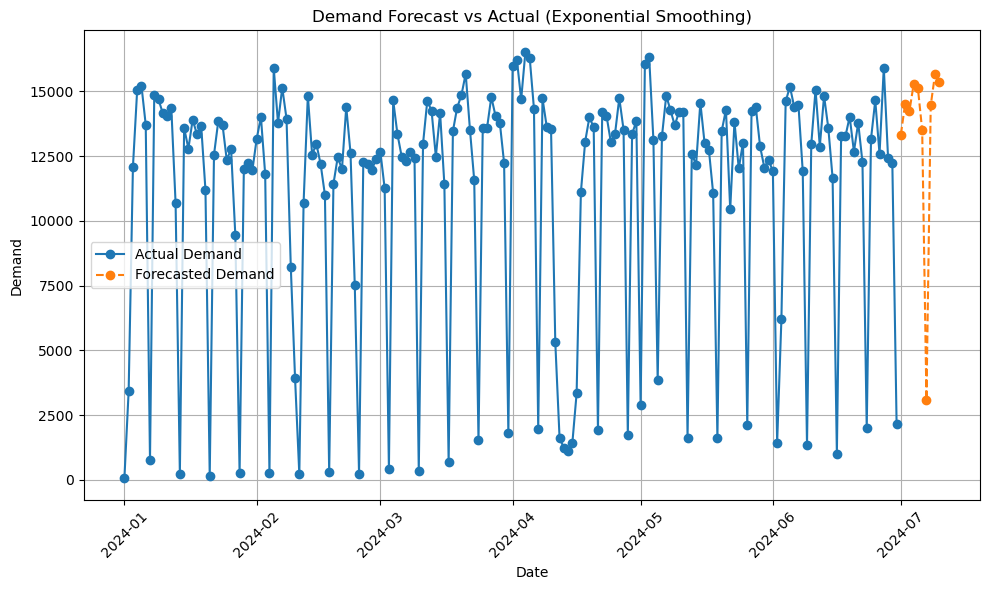

                   ds          yhat
2024-07-01 2024-07-01  13332.571825
2024-07-02 2024-07-02  14522.067053
2024-07-03 2024-07-03  14229.441023
2024-07-04 2024-07-04  15275.335259
2024-07-05 2024-07-05  15113.446919
2024-07-06 2024-07-06  13496.553083
2024-07-07 2024-07-07   3089.113550
2024-07-08 2024-07-08  14461.258106
2024-07-09 2024-07-09  15650.753334
2024-07-10 2024-07-10  15358.127303


In [135]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

def forecast_with_exponential_smoothing(data: pd.DataFrame, date_col: str, value_col: str, periods: int, trend: str='add', seasonal: str='add', seasonal_periods: int=7) -> pd.DataFrame:
    """
    Forecast future values using Exponential Smoothing.

    Parameters:
    - data: DataFrame with a DateTime index and the column to forecast.
    - date_col: Column name with date information.
    - value_col: Column name with values to forecast.
    - periods: Number of periods to forecast.
    - trend: Type of trend component ('add' or 'mul').
    - seasonal: Type of seasonal component ('add' or 'mul').
    - seasonal_periods: Number of periods in a season.

    Returns:
    - DataFrame with forecasted values.
    """
    # Ensure the date column is a DateTime index
    data[date_col] = pd.to_datetime(data[date_col])
    data.set_index(date_col, inplace=True)

    # Fit the Exponential Smoothing model
    model = ExponentialSmoothing(data[value_col], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit()

    # Forecast future values
    forecast = fit.forecast(steps=periods)

    # Create a DataFrame for forecast results
    forecast_index = pd.date_range(start=data.index.max() + pd.Timedelta(days=1), periods=periods)
    forecast_df = pd.DataFrame({
        'ds': forecast_index,
        'yhat': forecast
    })

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[value_col], label='Actual Demand', marker='o')
    plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Forecasted Demand', marker='o', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Demand')
    plt.title('Demand Forecast vs Actual (Exponential Smoothing)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return forecast_df


forecast_df = forecast_with_exponential_smoothing(data, date_col='ds', value_col='เชียงใหม่', periods=10)
print(forecast_df)


c:\Users\vithc\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


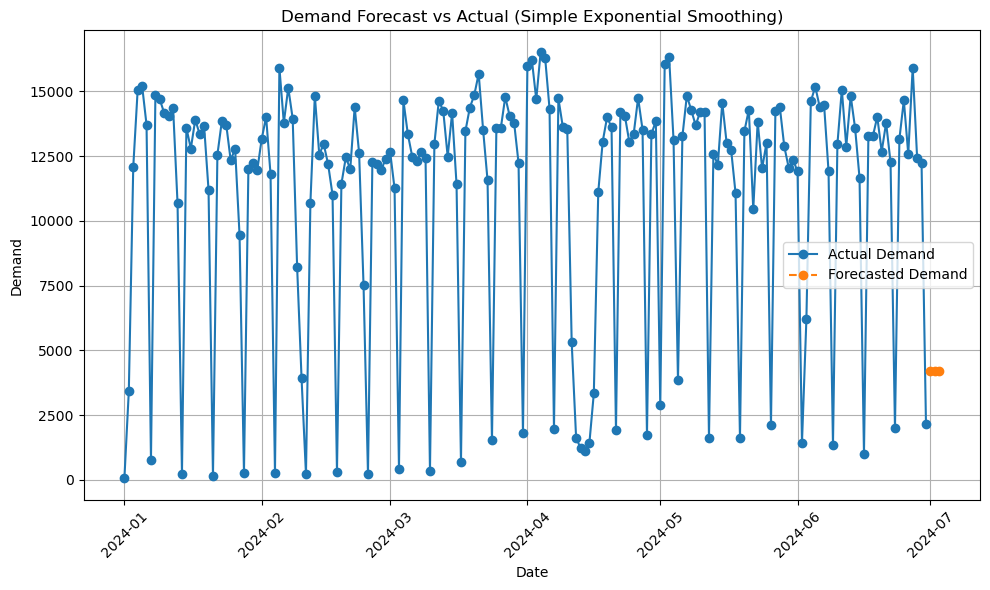

                   ds         yhat
2024-07-01 2024-07-01  4219.221535
2024-07-02 2024-07-02  4219.221535
2024-07-03 2024-07-03  4219.221535


In [138]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

def forecast_with_simple_exponential_smoothing(data: pd.DataFrame, date_col: str, value_col: str, periods: int) -> pd.DataFrame:
    """
    Forecast future values using Single Exponential Smoothing.

    Parameters:
    - data: DataFrame with a DateTime index and the column to forecast.
    - date_col: Column name with date information.
    - value_col: Column name with values to forecast.
    - periods: Number of periods to forecast.

    Returns:
    - DataFrame with forecasted values.
    """
    # Ensure the date column is a DateTime index
    data[date_col] = pd.to_datetime(data[date_col])
    data.set_index(date_col, inplace=True)

    # Fit the Single Exponential Smoothing model
    model = SimpleExpSmoothing(data[value_col])
    fit = model.fit(smoothing_level=0.8, optimized=False)  # Adjust smoothing_level if needed

    # Forecast future values
    forecast = fit.forecast(steps=periods)

    # Create a DataFrame for forecast results
    forecast_index = pd.date_range(start=data.index.max() + pd.Timedelta(days=1), periods=periods)
    forecast_df = pd.DataFrame({
        'ds': forecast_index,
        'yhat': forecast
    })

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[value_col], label='Actual Demand', marker='o')
    plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Forecasted Demand', marker='o', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Demand')
    plt.title('Demand Forecast vs Actual (Simple Exponential Smoothing)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return forecast_df

forecast_df = forecast_with_simple_exponential_smoothing(data, date_col='ds', value_col='เชียงใหม่', periods=3)
print(forecast_df)